In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
datadir_raw = 'F:/Masters/MRP/Datasets_Raw/'
datadir_final = 'F:/Masters/MRP/Datasets/'

Getting all the equities data in the desired format. Eg: changing the datatypes for all the columns and adding a new column "Symbol" which will contain the Symbol name for all the equities. It will be helpful if we merge the whole dataset together in the future.

For Large Cap Equities

In [123]:
large_cap_stocks_metedata = pd.read_csv(datadir_raw+"Large_cap_equities/large_cap_stocks_metedata.csv")
large_cap_stocks_metedata #Metadata for Large Cap Equities

,Company Name,Bse,Industry,Symbol,Market Cap
0,ABB India Ltd,500002,Electric Equipment,ABB,Large
1,Adani Energy Solutions Ltd,539254,Power Generation And Supply,ADANIENSOL,Large
2,Adani Enterprises Ltd,512599,Trading,ADANIENT,Large
3,Adani Green Energy Ltd,541450,Power Generation And Supply,ADANIGREEN,Large
4,Adani Ports and Special Economic Zone Ltd.,532921,Marine Port & Services,ADANIPORTS,Large
...,...,...,...,...,...
85,Varun Beverages Ltd,540180,FMCG - Food Processing,VBL,Large
86,Vedanta Ltd.,500295,Mining & Mineral products,VEDL,Large
87,Wipro Ltd.,507685,Computers - Software,WIPRO,Large
88,Zee Entertainment Enterprises Ltd.,505537,Entertainment / Electronic Media Software,ZEEL,Large


In [127]:
for filenames in large_cap_stocks_metedata['Bse']:
    equity_link = 'Large_cap_equities/'+str(filenames)+'.csv' 
    equity = pd.read_csv(datadir_raw+equity_link) #reading the equity data file
    equity['Date'] = pd.to_datetime(equity['Date'], format='mixed') #converting the date column to datetime format
    symbol = large_cap_stocks_metedata.loc[large_cap_stocks_metedata['Bse'] == filenames, 'Symbol'].values[0] #getting the symbol name from the metadata file for that equity
    equity['Symbol'] = symbol #creating a new column with the Symbol name
    equity_sorted = equity.sort_values(by='Date') #sorting the whole dataframe by Date
    equity_sorted.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'WAP',
       'Volume', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Symbol'] #Changing few column names for to standard financial data column name 
    equity_sorted.set_index('Date', inplace=True) #Making Date column as index
    equity_sorted.interpolate(method='time', inplace=True) #handling all missing values using interpolate's time method, adjusting the nan values based on the previous and forthcoming data.
    equity_sorted.reset_index(inplace=True)
    equity_sorted.to_csv(datadir_final+equity_link, index=False) #Saving the file to new folder datasets

In [128]:
equity_temp = pd.read_csv(datadir_final+'Large_cap_equities/507685.csv') # Showing charts on one random equity.
equity_temp['Date'] = pd.to_datetime(equity_temp['Date'], format='mixed')
equity_temp

,Date,Open,High,Low,Close,WAP,Volume,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Symbol
0,2014-01-01,561.80,562.10,550.90,552.75,555.348371,68519,2340,38051915.0,16379.0,23.90,11.20,-9.05,WIPRO
1,2014-01-02,553.00,556.70,546.00,552.90,552.439405,99678,2533,55066055.0,30425.0,30.52,10.70,-0.10,WIPRO
2,2014-01-03,550.40,558.95,547.50,557.15,554.918260,94446,3210,52409810.0,17235.0,18.25,11.45,6.75,WIPRO
3,2014-01-06,558.40,564.40,555.05,558.05,559.217261,178799,5503,99987487.0,73598.0,41.16,9.35,-0.35,WIPRO
4,2014-01-07,558.70,558.70,546.75,549.95,551.360448,100131,5261,55208273.0,31621.0,31.58,11.95,-8.75,WIPRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2024-04-24,462.35,464.70,458.60,460.20,461.852036,89738,3298,41445678.0,40037.0,44.62,6.10,-2.15,WIPRO
2550,2024-04-25,458.25,462.30,455.90,461.00,460.448188,361799,11761,166589694.0,226171.0,62.51,6.40,2.75,WIPRO
2551,2024-04-26,461.30,475.70,461.30,464.65,469.199643,896290,23231,420538948.0,360748.0,40.25,14.40,3.35,WIPRO
2552,2024-04-29,466.25,468.00,461.60,462.95,463.380343,285939,10104,132498512.0,142907.0,49.98,6.40,-3.30,WIPRO


In [129]:
equity_temp.isna().sum() #Check if any columns has nan values

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
Volume                       0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
Symbol                       0
dtype: int64

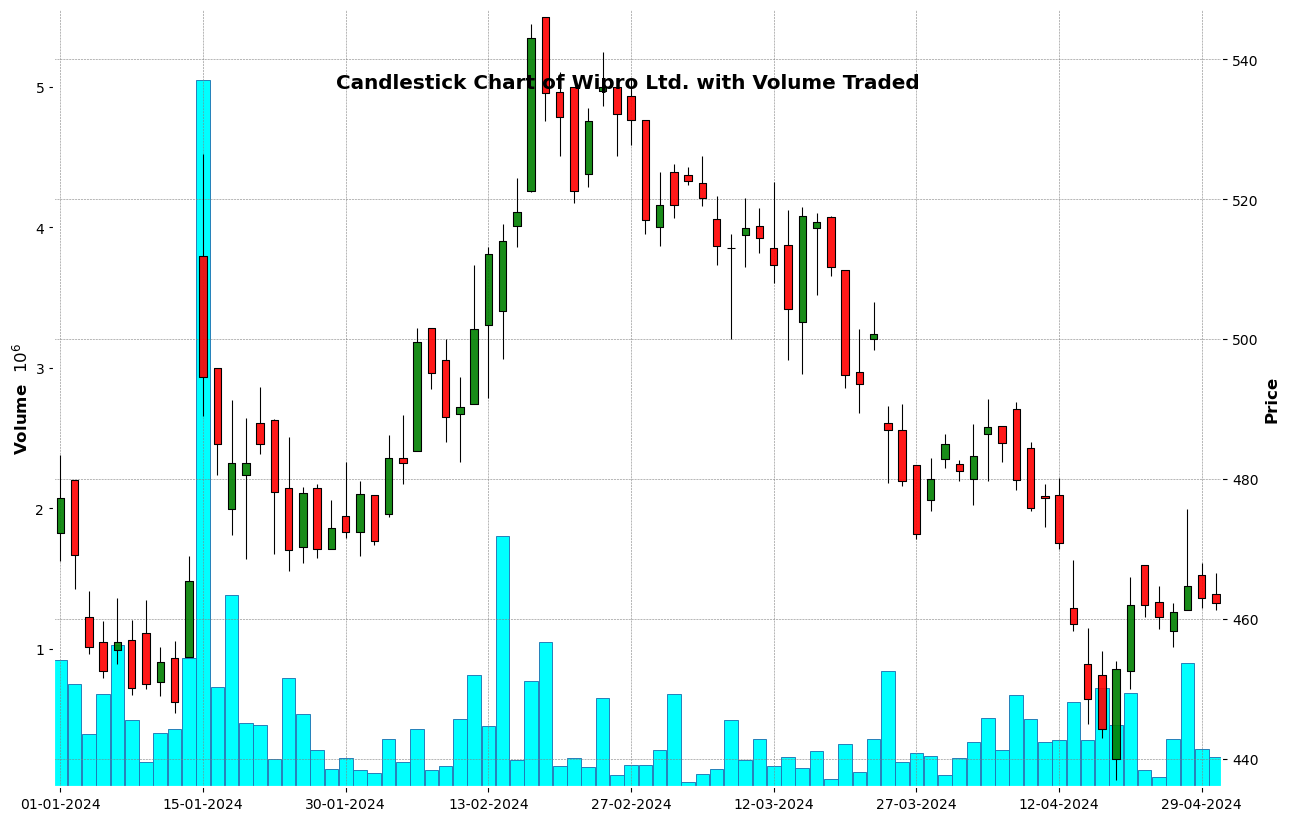

In [130]:
start_date = '2024-01-01'
end_date = '2024-04-30'
data = equity_temp[(equity_temp['Date'] >= start_date) & (equity_temp['Date'] <= end_date)]
data.set_index('Date', inplace=True)
custom_style = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mpf.make_marketcolors(volume='cyan',up='g', down='r'), gridcolor='gray'  )
symbol_name = data['Symbol'][0]
company_name = large_cap_stocks_metedata.loc[large_cap_stocks_metedata['Symbol'] == symbol_name, 'Company Name'].values[0]
mpf.plot(data, type='candle', style=custom_style, title=f'Candlestick Chart of {company_name} with Volume Traded',
         ylabel='Price', figsize=(12, 8), volume=True, volume_panel=0,
         figscale=1.2, tight_layout=True, scale_padding=0.2, xrotation=0,
         datetime_format='%d-%m-%Y', show_nontrading=False)

For Mid Cap Equities

In [131]:
mid_cap_stocks_metedata = pd.read_csv(datadir_raw+"Mid_cap_equities/mid_cap_stocks_metedata.csv")
mid_cap_stocks_metedata #Metadata for Mid Cap Equities

,Company Name,Bse,Industry,Symbol,Market Cap
0,Abbott India Ltd,500488,Pharmaceuticals - Bulk Drugs & Formln,ABBOTINDIA,Mid
1,Aditya Birla Capital Ltd,540691,Finance & Investments,ABCAPITAL,Mid
2,Aditya Birla Fashion & Retail Ltd,535755,Textiles - Retail,ABFRL,Mid
3,Alkem Laboratories Ltd,539523,Pharmaceuticals - Bulk Drugs & Formln,ALKEM,Mid
4,Ashok Leyland Ltd,500477,Automobiles - LCVs / HCVs,ASHOKLEY,Mid
...,...,...,...,...,...
84,Union Bank of India,532477,Banks - Public Sector,UNIONBANK,Mid
85,Vodafone Idea Ltd,532822,Telecommunications - Service Provider,IDEA,Mid
86,Voltas Ltd,500575,Air-conditioners,VOLTAS,Mid
87,Whirlpool of India Ltd,500238,Domestic Appliances,WHIRLPOOL,Mid


In [132]:
for filenames in mid_cap_stocks_metedata['Bse']:
    equity_link = 'Mid_cap_equities/'+str(filenames)+'.csv' 
    equity = pd.read_csv(datadir_raw+equity_link) #reading the equity data file
    equity['Date'] = pd.to_datetime(equity['Date'], format='mixed') #converting the date column to datetime format
    symbol = mid_cap_stocks_metedata.loc[mid_cap_stocks_metedata['Bse'] == filenames, 'Symbol'].values[0] #getting the symbol name from the metadata file for that equity
    equity['Symbol'] = symbol #creating a new column with the Symbol name
    equity_sorted = equity.sort_values(by='Date') #sorting the whole dataframe by Date
    equity_sorted.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'WAP',
       'Volume', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Symbol'] #Changing few column names for to standard financial data column name 
    equity_sorted.set_index('Date', inplace=True) #Making Date column as index
    equity_sorted.interpolate(method='time', inplace=True) #handling all missing values using interpolate's time method, adjusting the nan values based on the previous and forthcoming data.
    equity_sorted.reset_index(inplace=True)
    equity_sorted.to_csv(datadir_final+equity_link, index=False) #Saving the file to new folder datasets

In [133]:
equity_temp = pd.read_csv(datadir_final+'Mid_cap_equities/500477.csv')# Showing charts on one random equity.
equity_temp['Date'] = pd.to_datetime(equity_temp['Date'], format='mixed')
equity_temp

,Date,Open,High,Low,Close,WAP,Volume,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Symbol
0,2014-01-01,17.40,17.40,17.15,17.20,17.232925,337418,745,5814699.0,142683.0,42.29,0.25,-0.20,ASHOKLEY
1,2014-01-02,17.25,17.95,17.15,17.70,17.646351,2364504,4058,41724867.0,742006.0,31.38,0.80,0.45,ASHOKLEY
2,2014-01-03,17.95,19.05,17.60,18.90,18.410959,5349029,9472,98480752.0,1360343.0,25.43,1.45,0.95,ASHOKLEY
3,2014-01-06,19.00,19.20,18.45,18.65,18.767779,2546298,3957,47788357.0,677526.0,26.61,0.75,-0.35,ASHOKLEY
4,2014-01-07,18.80,19.05,18.20,18.35,18.426822,1258903,2430,23197581.0,282676.0,22.45,0.85,-0.45,ASHOKLEY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2024-04-24,175.25,178.35,174.40,177.55,176.550180,1233549,7507,217783298.0,695062.0,56.35,3.95,2.30,ASHOKLEY
2550,2024-04-25,178.00,178.75,177.05,177.70,177.992198,793032,4510,141153509.0,500273.0,63.08,1.70,-0.30,ASHOKLEY
2551,2024-04-26,177.75,187.10,177.50,185.10,184.155282,4248833,30104,782445039.0,2402297.0,56.54,9.60,7.35,ASHOKLEY
2552,2024-04-29,187.65,188.00,184.90,185.35,186.444969,1323706,11568,246798324.0,644901.0,48.72,3.10,-2.30,ASHOKLEY


In [134]:
equity_temp.isna().sum() #Check if any columns has nan values

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
Volume                       0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
Symbol                       0
dtype: int64

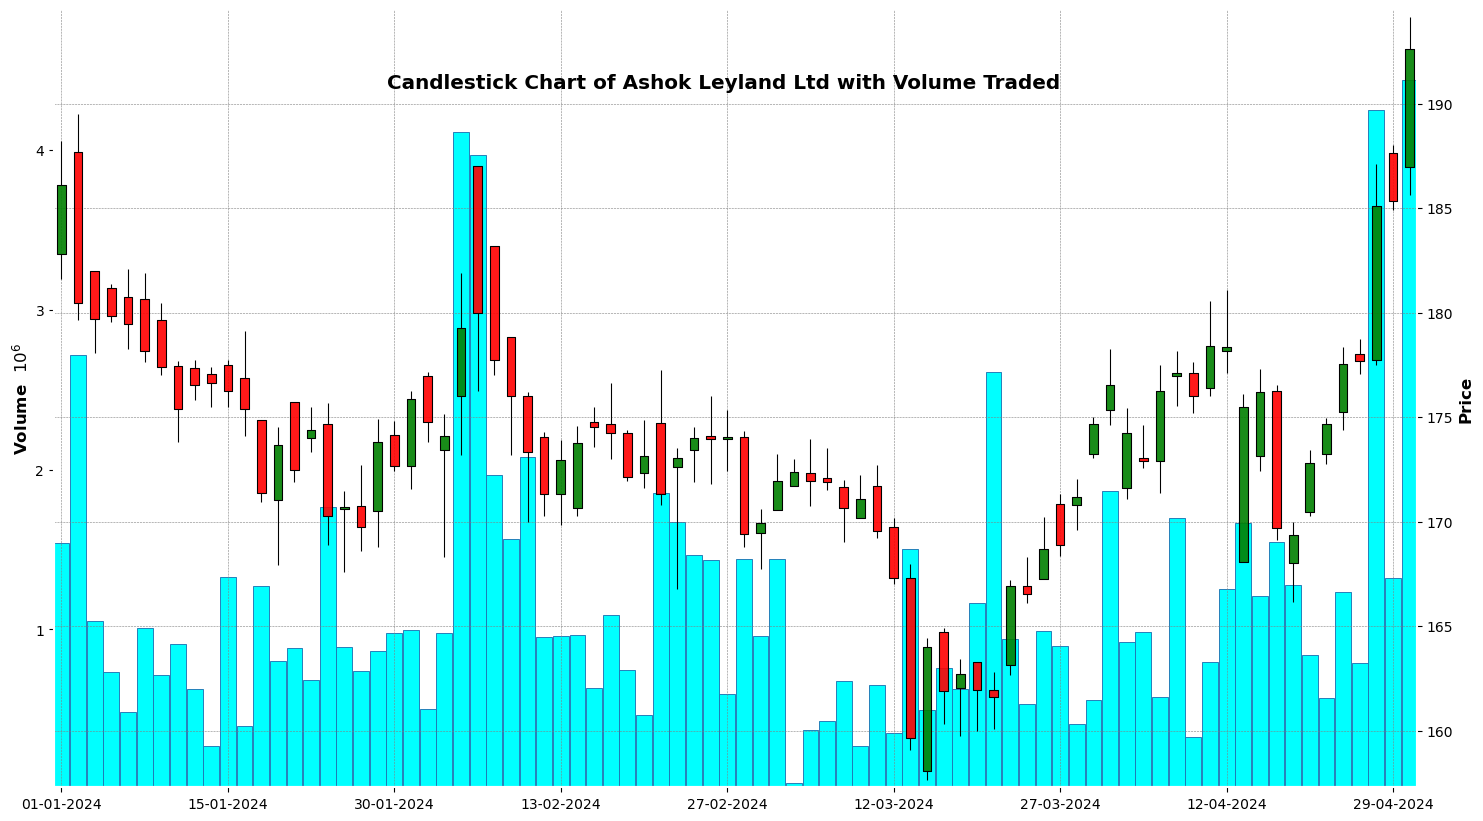

In [135]:
start_date = '2024-01-01'
end_date = '2024-04-30'
data = equity_temp[(equity_temp['Date'] >= start_date) & (equity_temp['Date'] <= end_date)]
data.set_index('Date', inplace=True)
custom_style = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mpf.make_marketcolors(volume='cyan',up='g', down='r'), gridcolor='gray'  )
symbol_name = equity_temp['Symbol'][0]
company_name = mid_cap_stocks_metedata.loc[mid_cap_stocks_metedata['Symbol'] == symbol_name, 'Company Name'].values[0]
mpf.plot(data, type='candle', style=custom_style, title=f'Candlestick Chart of {company_name} with Volume Traded',
         ylabel='Price', figsize=(14, 8), volume=True, volume_panel=0,
         figscale=1.2, tight_layout=True, scale_padding=0.2, xrotation=0,
         datetime_format='%d-%m-%Y', show_nontrading=False)

Small Cap Equities

In [138]:
small_cap_stocks_metedata = pd.read_csv(datadir_raw+"Small_cap_equities/small_cap_stocks_metedata.csv")
small_cap_stocks_metedata #Metadata for small Cap Equities

,Company Name,Bse,Industry,Symbol,Market Cap
0,Aarti Drugs Ltd,524348,Pharmaceuticals - Bulk Drugs & Formln,AARTIDRUGS,Small
1,Aegis Logistics Ltd,500003,Trading,AEGISCHEM,Small
2,Affle India Ltd,542752,Computers - Software,AFFLE,Small
3,Alkyl Amines Chemicals Ltd,506767,Chemicals,ALKYLAMINE,Small
4,Alok Industries Ltd,521070,Textiles - Processing,ALOKINDS,Small
...,...,...,...,...,...
88,V I P Industries Ltd,507880,Moulded Luggage,VIPIND,Small
89,Vakrangee Ltd,511431,Computers - Software,VAKRANGEE,Small
90,Welspun Living Ltd,514162,Textiles - Products,WELSPUNLIV,Small
91,Westlife Foodworld Ltd,505533,Hotels,WESTLIFE,Small


In [137]:
for filenames in small_cap_stocks_metedata['Bse']:
    equity_link = 'Small_cap_equities/'+str(filenames)+'.csv'
    equity = pd.read_csv(datadir_raw+equity_link) #reading the equity data file
    equity['Date'] = pd.to_datetime(equity['Date'], format='mixed') #converting the date column to datetime format
    symbol = small_cap_stocks_metedata.loc[small_cap_stocks_metedata['Bse'] == filenames, 'Symbol'].values[0] #getting the symbol name from the metadata file for that equity
    equity['Symbol'] = symbol #creating a new column with the Symbol name
    equity_sorted = equity.sort_values(by='Date') #sorting the whole dataframe by Date
    equity_sorted.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'WAP',
       'Volume', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Symbol'] #Changing few column names for to standard financial data column name 
    equity_sorted.set_index('Date', inplace=True) #Making Date column as index
    equity_sorted.interpolate(method='time', inplace=True) #handling all missing values using interpolate's time method, adjusting the nan values based on the previous and forthcoming data.
    equity_sorted.reset_index(inplace=True)
    equity_sorted.to_csv(datadir_final+equity_link, index=False) #Saving the file to new folder datasets

In [139]:
equity_temp = pd.read_csv(datadir_final+'Small_cap_equities/507880.csv') # Showing charts on one random equity.
equity_temp['Date'] = pd.to_datetime(equity_temp['Date'], format='mixed')
equity_temp

,Date,Open,High,Low,Close,WAP,Volume,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Symbol
0,2014-01-01,64.50,66.10,64.15,65.30,65.256439,229688,2574,14988621.0,53223.0,23.17,1.95,0.80,VIPIND
1,2014-01-02,65.10,69.35,63.75,64.60,67.154708,1064022,10338,71454087.0,220466.0,20.72,5.60,-0.50,VIPIND
2,2014-01-03,66.80,69.40,65.60,68.55,67.356735,1372746,12733,92463689.0,281316.0,20.49,3.80,1.75,VIPIND
3,2014-01-06,68.60,71.95,66.75,71.05,70.268296,1341870,12468,94290919.0,206162.0,15.36,5.20,2.45,VIPIND
4,2014-01-07,71.30,73.10,70.25,70.75,71.784178,963594,7750,69170803.0,225253.0,23.38,2.85,-0.55,VIPIND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2024-04-24,539.35,561.00,538.65,554.00,554.340878,66622,1539,36931298.0,44712.0,67.11,22.35,14.65,VIPIND
2550,2024-04-25,549.15,559.75,545.65,552.80,554.782316,37922,1712,21038455.0,17883.0,47.16,14.10,3.65,VIPIND
2551,2024-04-26,559.65,559.65,543.80,545.65,548.979114,11443,709,6281968.0,4579.0,40.02,15.85,-14.00,VIPIND
2552,2024-04-29,543.65,566.35,543.65,550.10,557.145788,18184,889,10131139.0,8489.0,46.68,22.70,6.45,VIPIND


In [140]:
equity_temp.isna().sum() #Check if any columns has nan values

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
Volume                       0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
Symbol                       0
dtype: int64

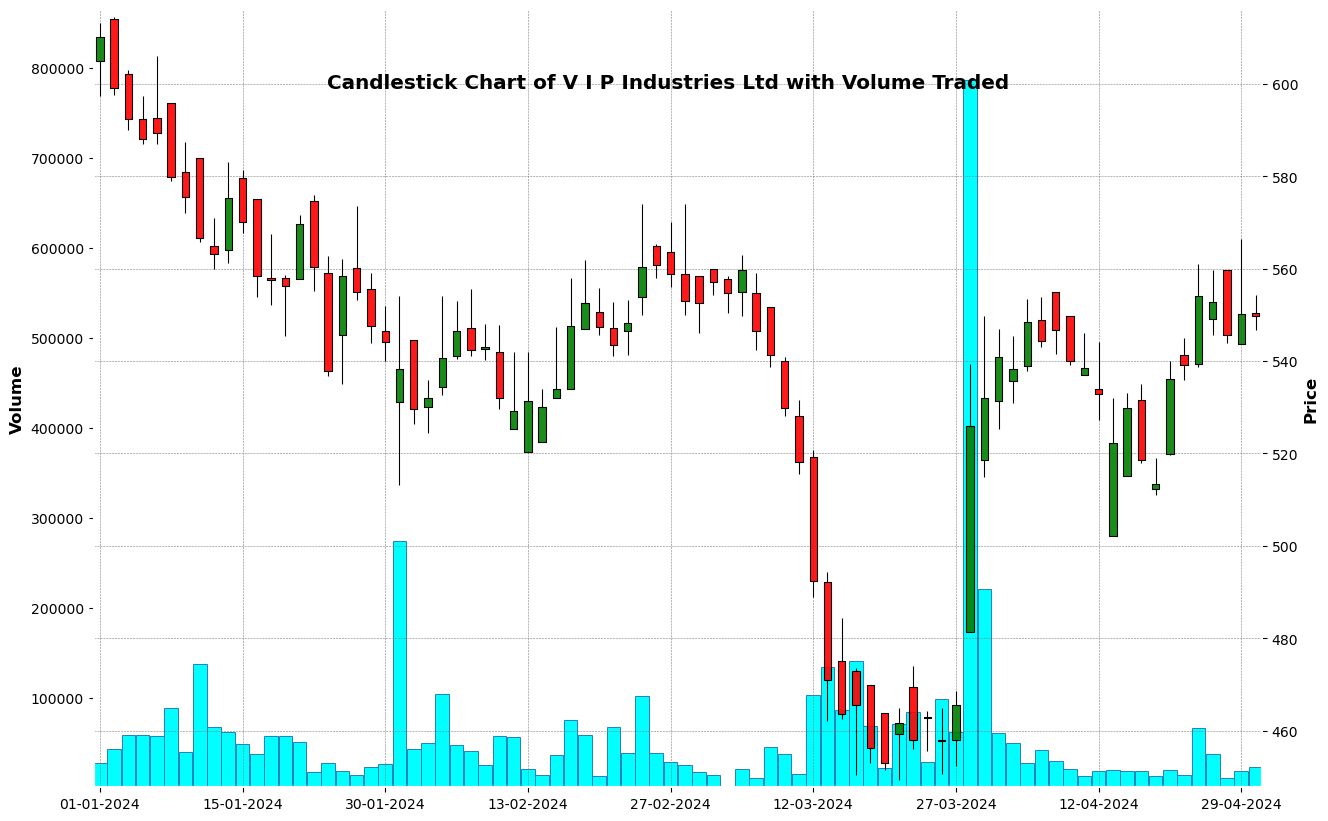

In [143]:
start_date = '2024-01-01'
end_date = '2024-04-30'
data = equity_temp[(equity_temp['Date'] >= start_date) & (equity_temp['Date'] <= end_date)]
data.set_index('Date', inplace=True)
custom_style = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mpf.make_marketcolors(volume='cyan',up='g', down='r'), gridcolor='gray'  )
symbol_name = equity_temp['Symbol'][0]
company_name = small_cap_stocks_metedata.loc[small_cap_stocks_metedata['Symbol'] == symbol_name, 'Company Name'].values[0]
mpf.plot(data, type='candle', style=custom_style, title=f'Candlestick Chart of {company_name} with Volume Traded',
         ylabel='Price', figsize=(12, 8), volume=True, volume_panel=0,
         figscale=1.2, tight_layout=True, scale_padding=0.2, xrotation=0,
         datetime_format='%d-%m-%Y', show_nontrading=False)